## Import library

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import yaml
import re
import matplotlib.pyplot as plt
import os
# os.chdir("NLP_ENSAE_Project/")
# os.getcwd()

pd.set_option('future.no_silent_downcasting', True)

## Load data and tokens

In [2]:
!cd NLP_ENSAE_Project
with open('../data/entities.json', 'r') as file:
    data = json.load(file)

with open('../data/tokens.yml', 'r') as file:
    tokens = yaml.safe_load(file)
    
token_dict = {}
for col in tokens.keys():
    token = tokens[col]['start']
    token_dict[token] = col

token_dict

/bin/bash: line 1: cd: NLP_ENSAE_Project: No such file or directory


{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

## Some Useful functions in my own .py

In [3]:
os.chdir("../")
from src.useful_functions import *

## Preprocessing

In [4]:
df = get_preprocessing_done(data, tokens,  token_dict)

100%|██████████| 1218/1218 [00:00<00:00, 2433.30it/s]


In [5]:
print("The resulted dataframe contains " + str(df.shape[1]) + " features")

The resulted dataframe contains 14 features


In [6]:
print("The resulted dataframe contains " + str(df.shape[0]) + " people")

The resulted dataframe contains 25074 people


In [7]:
df.head()

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton,NaN
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Ferazzi
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Machol
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN,Desbois
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat,NaN


In [8]:
df = df.rename(columns={"surname_household": "Is_household"})
X = df.drop(columns=['Is_household'])
y = df['Is_household'].apply(
                                lambda x: 0 if pd.isna(x) else 1
                            )

# y_dict = { "Is_household" : df['surname_household'] == df['firstname'].apply(
#                                                                 lambda x: 0 if not x else 1
#                                                                 ) }
# y = pd.DataFrame(y_dict)

In [9]:
X

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25433,NaN,1869,NaN,NaN,NaN,Marie,chef,Pailharès,NaN,idem,NaN,NaN,NaN
25434,NaN,1863,NaN,NaN,Cara,Marie,chef,St Naz en Royans,NaN,idem,NaN,ouv chaus res,NaN
25435,NaN,1886,NaN,NaN,Baretto,Nello,chef,Castel,NaN,italienne,NaN,manoeuvre,NaN
25436,NaN,1887,NaN,NaN,NaN,Annunziata,épouse,idem,NaN,idem,NaN,NaN,Berni-Laureti


In [10]:
y

0        0
1        1
2        1
3        1
4        0
        ..
25433    1
25434    1
25435    1
25436    0
25437    0
Name: Is_household, Length: 25074, dtype: int64

In [11]:
print("They are " + str(df.shape[0]) + " people")
print(str(y.sum()) + " of them are householder")
print("Which is equivalent of " + str(round(y.sum()*100/df.shape[0], 2)) + " % << 50%")

They are 25074 people
5640 of them are householder
Which is equivalent of 22.49 % << 50%


In [12]:
import missingno as msno

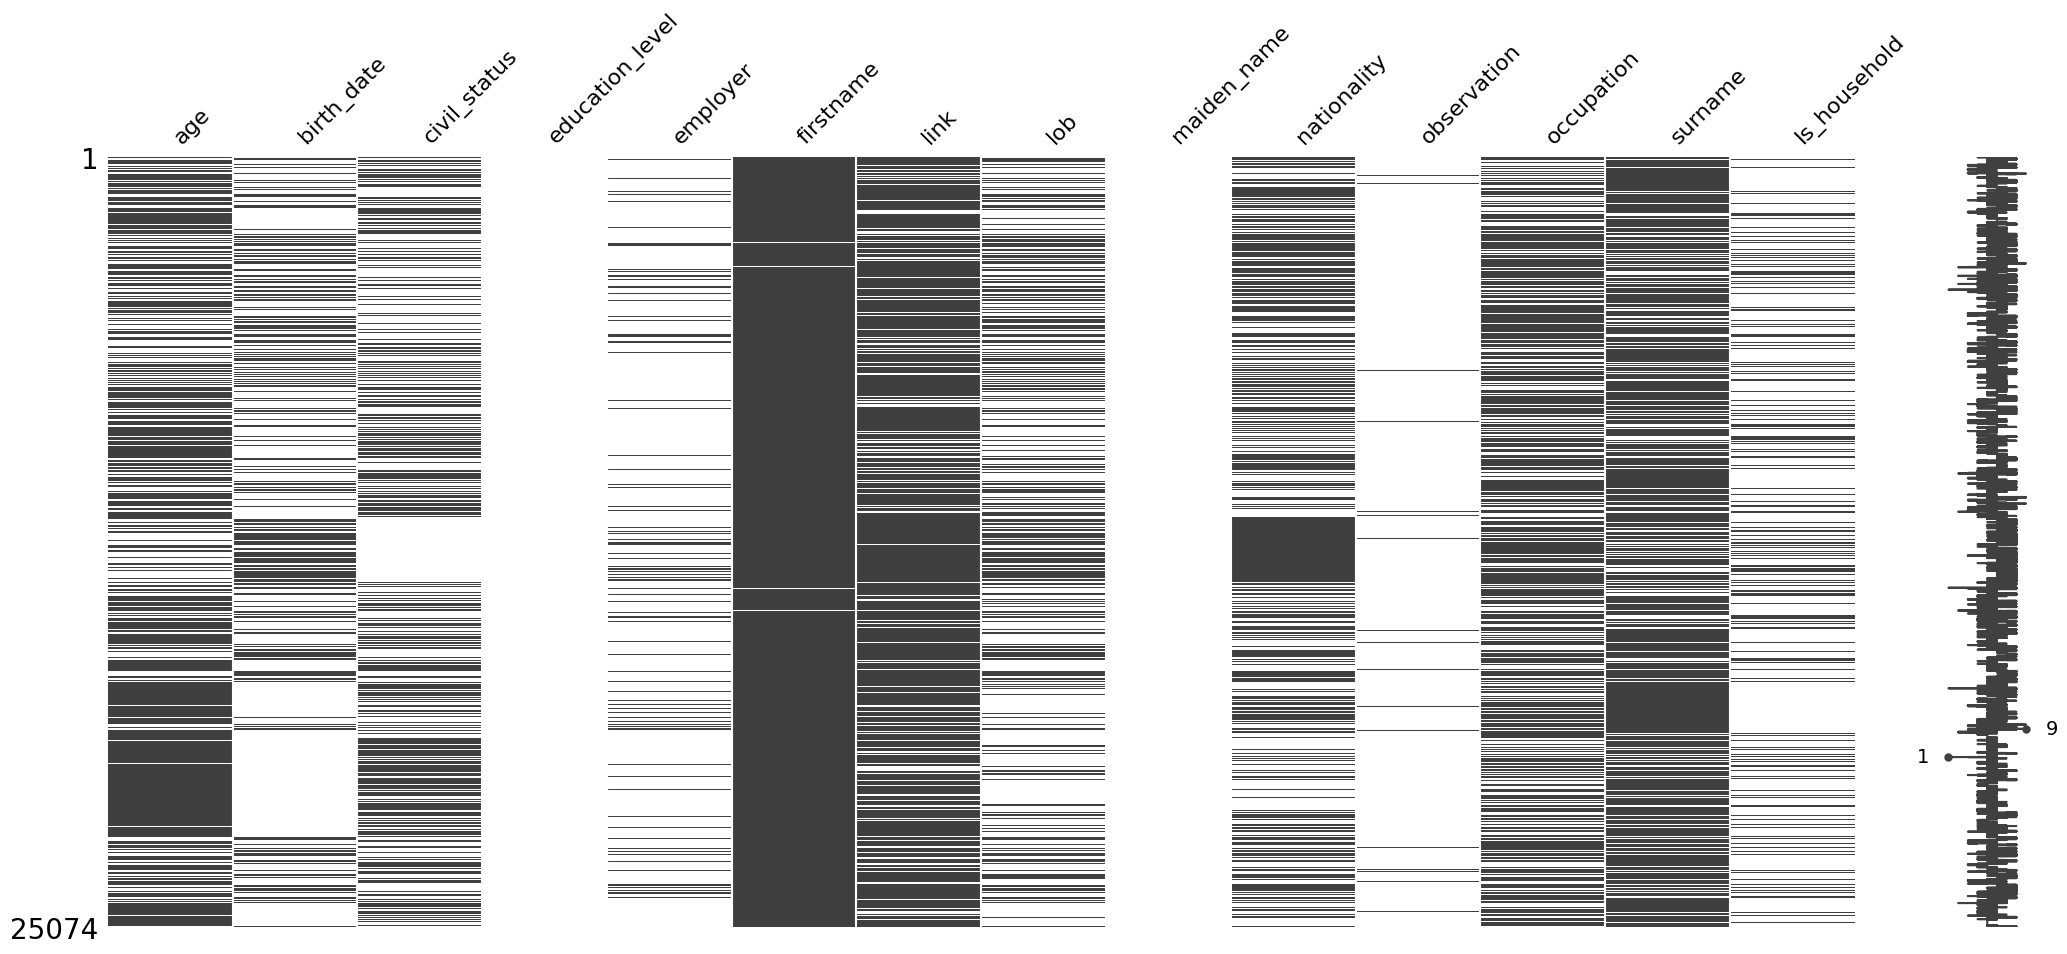

In [13]:
# Missingness
fig = msno.matrix(df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

### Observation
We are dealing with imbalanced classes

## Visualisation

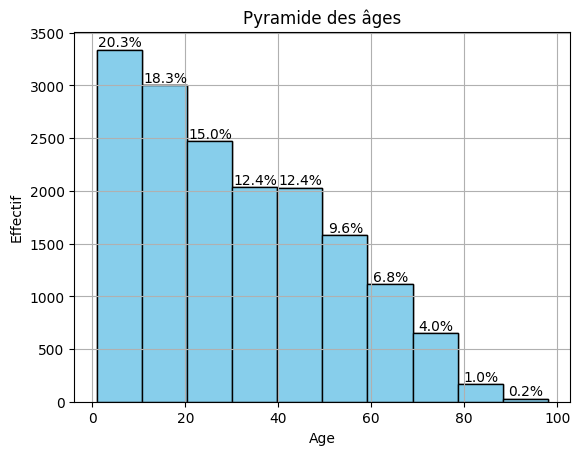

In [14]:
plot_histogramm(df, 'age')

In [15]:
df['civil_status'].unique()

array(['Garçon', 'Homme marié', nan, 'Fille', 'Femme mariée', 'Veuve',
       'Veuf'], dtype=object)

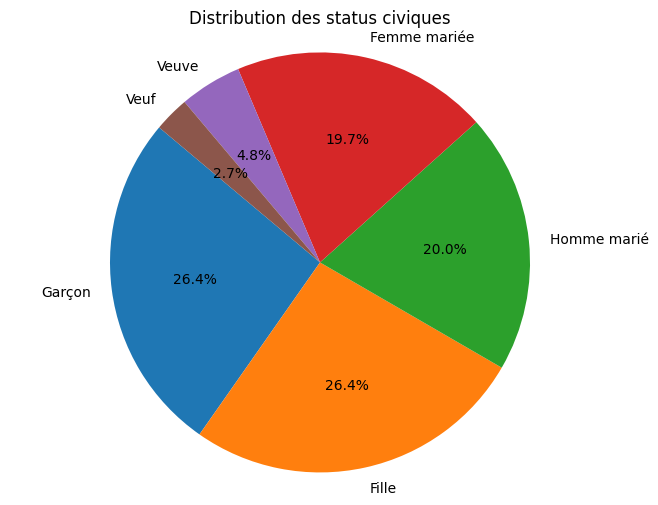

In [16]:
plot_pie_chart(df, 'civil_status', 'Distribution des status civiques')

In [17]:
df["Men"] = df['civil_status'].dropna().isin(['Homme marié', 'Garçon','Veuf'])

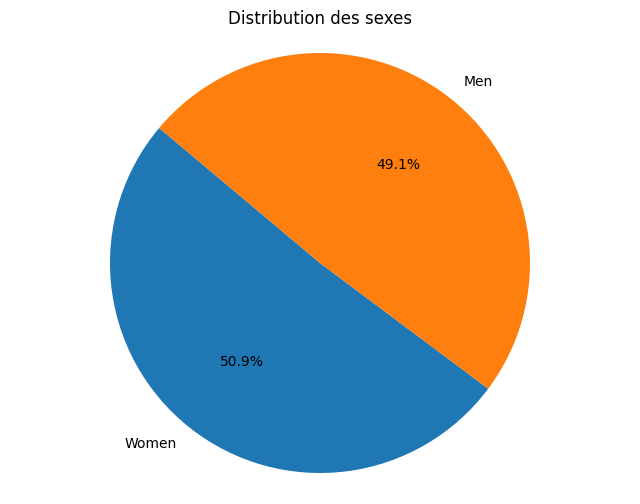

In [18]:
plot_pie_chart(df, 'Men', 'Distribution des sexes', True , ["Women", "Men"])

In [19]:
df['link'].unique()[:50]

array([nan, 'sa fe', 'le fils', 'sa femme', 'fille', 'fils', 'enfant',
       'idem', 'chef', 'femme', 'épouse', 'domestique', 'soeur',
       'leur fils', 'leur fille', 'son fils', 'gendre du chef',
       'fille du chef', 'mère du chef', 'père dy chef', 'ouvrier',
       'Fille', 'Femme', 'frère', 'petit fils', 'petite fille', 'neveu',
       'nièce', 'fille de la précédente', 'cousine', 'seule', 'mère',
       'sa f', 'enft', 'famille', 'gendre', 'Chef de ménage', 'sa fille',
       'chef de ménage', 'Domestique', 'membre de famille',
       'chef du ménage', 'belle sœur du chef', 'tante', 'sa belle-mère',
       'mère de Roux Gilbert', 'sa fille enfant naturel', 'sa fille idem',
       'f me', 'enfant naturel'], dtype=object)

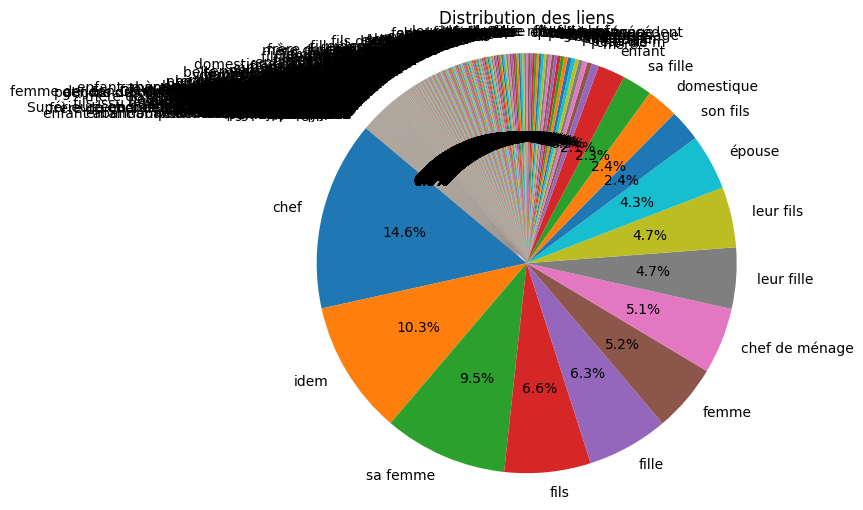

In [20]:
plot_pie_chart(df, 'link' , "Distribution des liens")

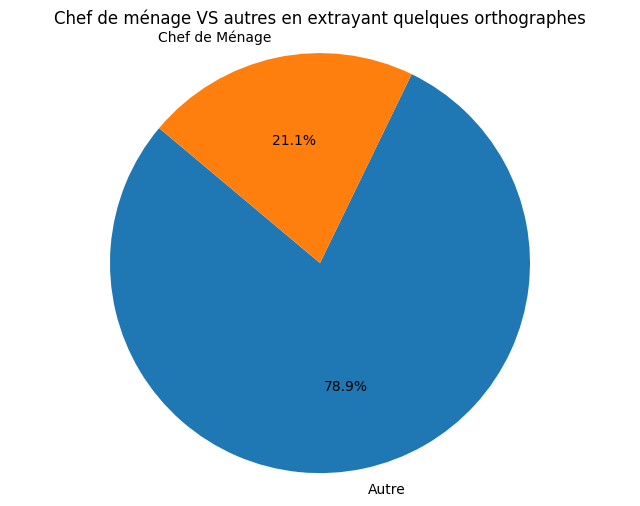

In [21]:
# Calculate value counts for each category
df['Is_chef'] = df['link'].dropna().isin(['chef','chef de mge',
                                          'chef de poste','propriétaire et chef de ménage',
                                          'cultivateur chef de ménage',
                                         'cultivateur chef de menage',
                                         'Chef de mén'
                                         'célibataire chef de ménage',
                                         'chef de mange',
                                         'chef de mé age',
                                         'chef d m',
                                         'chef de m e',
                                         'chef de m ge',
                                         'chef de f',
                                         'chef de mé',
                                         'chef de mén.',
                                         'chef de mén.',
                                         'Chef de menage',
                                         'chef de ménage et veuve',
                                         'chef domestique',
                                         'chef de fam',
                                         'chef de mén',
                                         'chef veuf',
                                         'Chef',
                                         'chef ménage',
                                         'chef de maison',
                                         'chef de mge',
                                         'chef de famille',
                                         'chef du ménage',
                                         'chef de ménage',
                                         'Chef de ménage'])
category_counts = df['Is_chef'].value_counts()

plot_pie_chart(df, 'Is_chef', "Chef de ménage VS autres en extrayant quelques orthographes", True , ["Autre", "Chef de Ménage"])

# In theory : 5640 / 25074 = 0.22 , we are close ! 

In [22]:
df['nationality'].unique()

array(['française', 'Piémontaise', 'francaise', 'idem', nan, 'français',
       'polonais', 'Polonais', 'belge', 'Idem', 'Française', 'iedm',
       'étrangère', 'Reims', 'Naturalisé',
       'Français né dans le département', 'Né hors le département',
       'Née dans le département', 'italien', 'espagnole',
       'Hyerre (S et O)', 'francaisse', 'ideù', 'allemand', 'Étranger',
       'franciase', 'frncaise', 'Savoisien', 'Eure et Loire', 'francais',
       'Suisse', 'Espagnole', 'Polonaise', 'fille', 'Français', 'id',
       'Landivisiau', 'portugaise', 'polonaise', 'Egliseneuve',
       'Theviers', 'Liorac', 'Allemans', 'Daglan', 'Hiban', 'Dunail',
       'Chasagnel', 'Chauffailles s et E', 'française naturalisée',
       'française naturalisé', 'anglaise', 'Portugaise', 'Belge',
       'Francaise', 'Hollandaise', 'Hollondaise', 'étranger', 'Allemande',
       'Luxembourgeois', 'luxembourgeoise', 'francçise', 'allemande',
       'Barthomeuf', 'h', "Française d'origine", 'Id', 'D', 

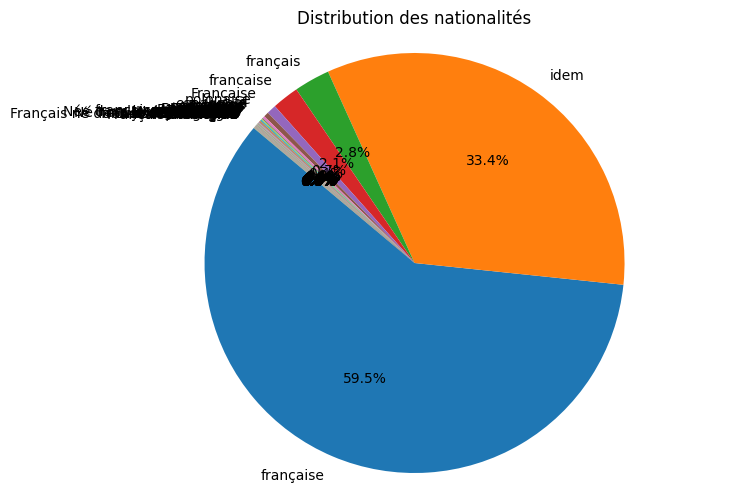

In [23]:
plot_pie_chart(df, 'nationality', "Distribution des nationalités")

In [24]:
df['observation'].unique()[:50]

array([nan, 'm. Brasp', 'm', 'v', 'm St Ségal', 'm Dinéault', 'St Ségal',
       'idem', 'en activité - Barré', 'veuve Gayet', 'femme du précédent',
       'fille de Vital', 'fils de Jean', 'fille du précédent',
       'fils de François', "fils d'André", 'fille de Charles',
       'aïeul des précédents', "fils d'Antoine", 'marié', 'veuf',
       'garçon', 'fille', 'veuve', 'veuve de Damevert',
       'occupée dans une autre commune', 'occupé dans une autre commune',
       'veuve Lafon', 'soldat classe de 1873', '2 7 10', 'Idiot',
       '1 7 10', '1 7 9', 'indigence',
       "voir profession suis septique sur le fait que l'enfant soit laboureur à son age",
       '78349', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63'], dtype=object)

In [25]:
len(df['occupation'].unique())

2057

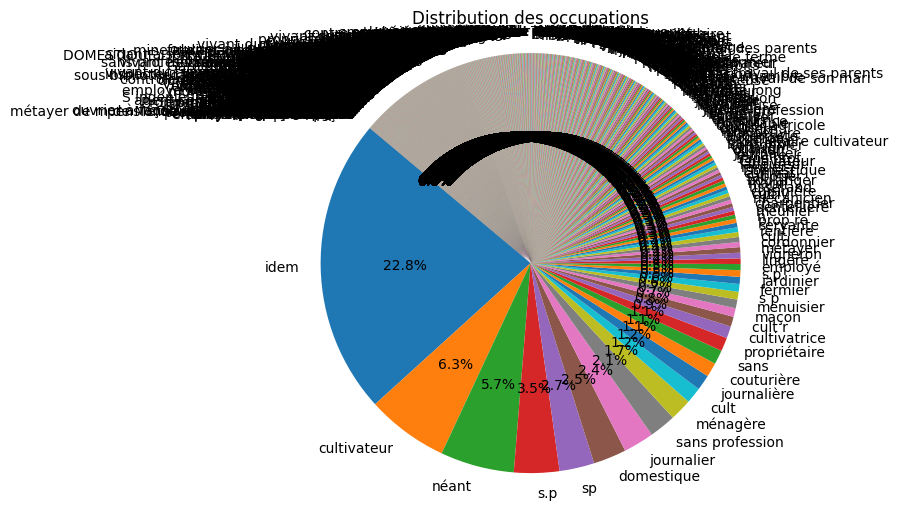

In [26]:
plot_pie_chart(df, 'occupation', "Distribution des occupations")